<a href="https://colab.research.google.com/github/jceresearch/paat/blob/master/charts_cheatsheets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Charts gallery  

This is a compendium of various charting techniques using matplotlib.  
I am not using further libraries to keep it basic (seaborn etc are covered elsewhere).  

TODO: make it more specific for audit use cases

In [1]:
#!Python3
from matplotlib import pyplot as plt
from matplotlib import ticker
import numpy as np
from scipy.stats import norm
import math
import plotly
import plotly.graph_objects as go
import pandas as pd
import random
import math
import numpy as np
from scipy.stats import loguniform
import datetime
from scipy.stats import poisson
from datetime import datetime, timedelta
print(datetime.now())
#plt.xkcd() # remove this to disable the handwritten look and feel.

2021-06-26 10:10:24.924708


In [2]:
df=pd.read_excel('./test_data/data.xlsx')
print(df.shape)
df.info()

FileNotFoundError: [Errno 2] No such file or directory: './test_data/data.xlsx'

We are going to plot based on the yyyymm that comes in the data (If you dont have it it should be easy to create, see the companion notebook for how that data was generated).  
In this case we have two plots overlaid: the volume and the percentage of meeting the SLA  
So we start by summarising to the right granularity

In [4]:
df['yyyymm']=df.apply(lambda r: str(r['date_created'].year)+'{:02d}'.format(r['date_created'].month) ,axis=1)
dfg1=df[['yyyymm','id']].groupby('yyyymm').agg(len)
dfg1.reset_index(inplace=True)
dfg2= df.groupby('yyyymm')['made_sla'].apply(lambda x: round(np.sum(x)/len(x),2))
dfg2= dfg2.reset_index()


KeyError: 'date_created'

In [ ]:

x_values = dfg1['yyyymm'] #will apply for both charts as they share same x axis
y_values=dfg1['id']
y2_values=s2=dfg2['made_sla']

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1, 1, 1)
ax.bar(x_values,y_values, width=.7, align='center')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
#ax.set_xlim([min(x_values)-1,max(x_values)+1])
#ax.set_ylim([0, max(y_values)+1])
ax.xaxis.set_major_locator(ticker.FixedLocator(x_values))
ax.set_xticklabels(x_values)
ax.set_xlabel('Period')
ax.set_ylabel('Number of Incidents')
ax.tick_params('y', colors='b')

#plt.yticks([]) # this is to customise the y axis, google options
ax2=ax.twinx()
ax2.plot(x_values,y2_values, linestyle='-', marker='o',color='r')
ax2.set_ylim([0,1])# or you could use max(y_values) to make it dynamic, for example to add one more to the max to give more room, because we are plotting percentages it is odd to have 120% so I didnt go there
ax2.set_ylabel('% compliance SLA', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
for i, v in enumerate(y2_values):
    ax2.annotate(str(v)+"%", (x_values[i], y2_values[i]), 
    xytext=(0, 10), 
    textcoords='offset pixels',  
    )

plt.title("Incidents")
plt.show()

Now we are going to go for a line chart and play with the annotations  


In [ ]:
dfg1['yyyymm'].to_list()

In [ ]:

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
x_values = dfg1['yyyymm']
y_values=dfg1['id']
#this is a small embedded function to find the value given a position in the list
def get_key_point(i):
    return (x_values[i],y_values[i])


#this gets the max value or values if there are more than one, could be alternative
# for now we print it for info, you can replace the top3_list by the max_list and presto
maxy=np.max(y_values)
max_list= np.where(y_values==maxy)
print("Max data point", y_values[max_list[0]])

top3_list=y_values.argsort()[-3:][::-1]

plt.xticks(range(len(x_values)),x_values, rotation=40, size='x-small')       
plt.yticks(np.arange(0,max(y_values)+1000,step=250))
ax.set_ylim(0,max(y_values)+1000)
ax.plot(x_values, y_values,linestyle='-', marker='o',color='r')
for m in top3_list:
    ax.annotate('Top 3:'+str(get_key_point(m)[1]), xy=get_key_point(m), arrowprops=dict(arrowstyle='->'), xytext=(60,-100),textcoords='offset pixels')
plt.title('Top Incidents')
plt.show()

In [ ]:
df.head()

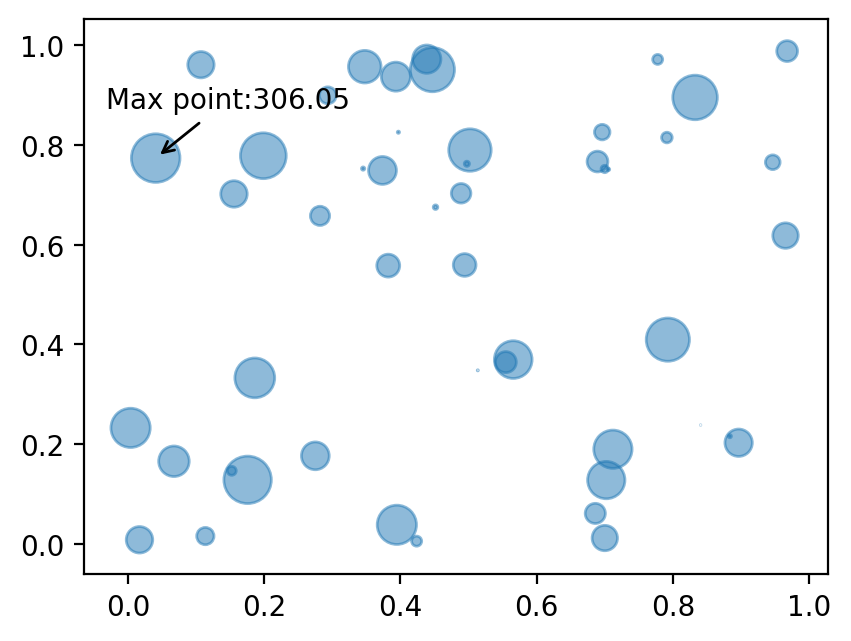

In [19]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)

area = np.pi * (10 * np.random.rand(N))**2 # 0 to 15 point radiuses
maxa=np.max(area)
maxi=list(area).index(maxa)
plt.scatter(x, y, s=area, alpha=0.5)
plt.annotate('Max point:'+str(round(maxa,2)), xy=(x[maxi],y[maxi]), arrowprops=dict(arrowstyle='->'), xytext=(-50,50),textcoords='offset pixels')
plt.show()

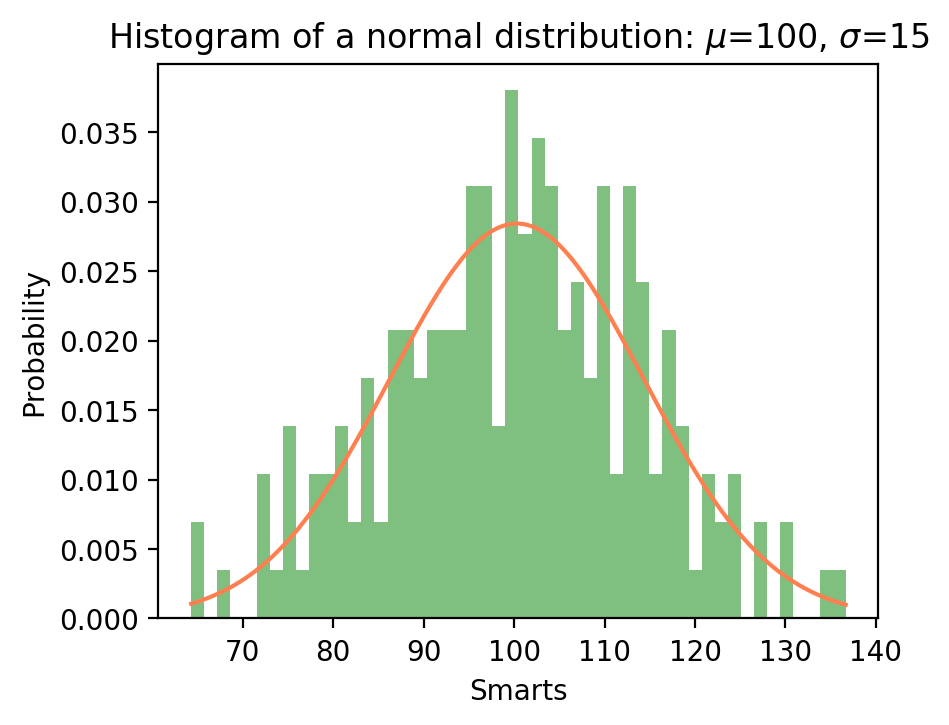

In [10]:
# coding: utf-8
'''
Demo of the histogram (hist) function with a few features.
In addition to the basic histogram, this demo shows a few optional features:
* Setting the number of data bins
* The ``normed`` flag, which normalizes bin heights so that the integral of the histogram is 1. The resulting histogram is a probability density.
* Setting the face color of the bars
* Setting the opacity (alpha value).
'''
# example data
mu = 100 # mean of distribution
sigma = 15 # standard deviation of distribution
x = mu + sigma * np.random.randn(200)


num_bins = 50
# the histogram of the data
n, bins, patches = plt.hist(x, num_bins, density=1, facecolor='green', alpha=0.5)
# add a 'best fit' line
x_min = np.min(x) #  
x_max = np.max(x) # 
mean = np.mean(x) #
std = np.std(x)
import scipy
xl = np.linspace(x_min, x_max, 1000)
yl = scipy.stats.norm.pdf(xl,mean,std)
plt.plot(xl,yl, color='coral')

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'Histogram against a normal distribution: $\mu$=' + str(mu) +r', $\sigma$='+str(sigma))

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

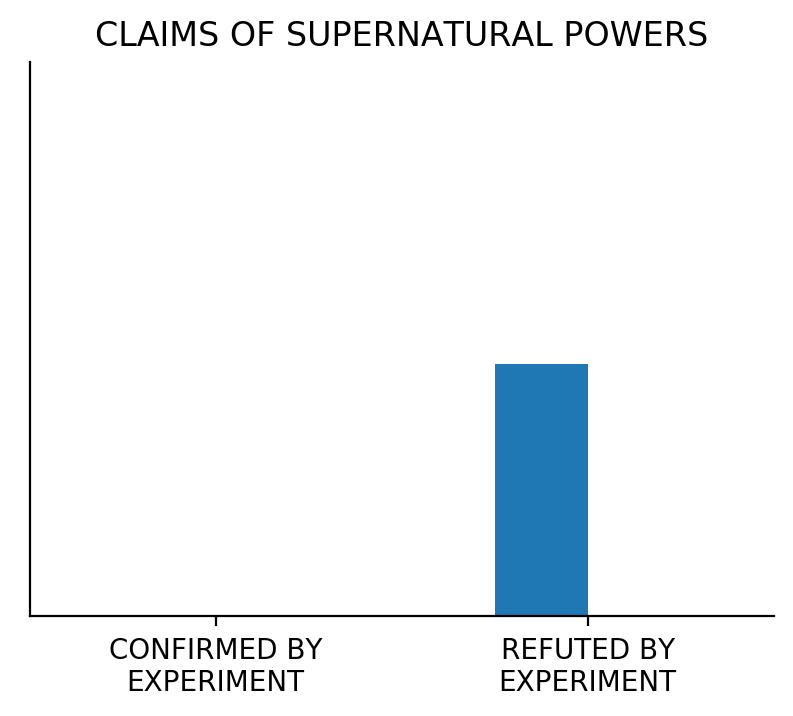

In [22]:

fig = plt.figure()


ax = fig.add_subplot(1, 1, 1)
ax.bar([-0.125, 1.0-0.125], [0,50], 0.25)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.set_xticks([0, 1])
ax.set_xlim([-0.5, 1.5])
ax.set_ylim([0, 110])
ax.set_xticklabels(['CONFIRMED BY\nEXPERIMENT', 'REFUTED BY\nEXPERIMENT'])
plt.yticks([])

plt.title("CLAIMS OF SUPERNATURAL POWERS")
plt.show()



(array([23., 20., 22., 24., 23., 17., 28., 32., 24., 25., 29., 25., 22.,
        25., 24., 28., 24., 31., 27., 27.]),
 array([2.55970765e-06, 4.99953619e-02, 9.99881641e-02, 1.49980966e-01,
        1.99973768e-01, 2.49966571e-01, 2.99959373e-01, 3.49952175e-01,
        3.99944977e-01, 4.49937779e-01, 4.99930581e-01, 5.49923384e-01,
        5.99916186e-01, 6.49908988e-01, 6.99901790e-01, 7.49894592e-01,
        7.99887394e-01, 8.49880197e-01, 8.99872999e-01, 9.49865801e-01,
        9.99858603e-01]),
 <a list of 20 Patch objects>)

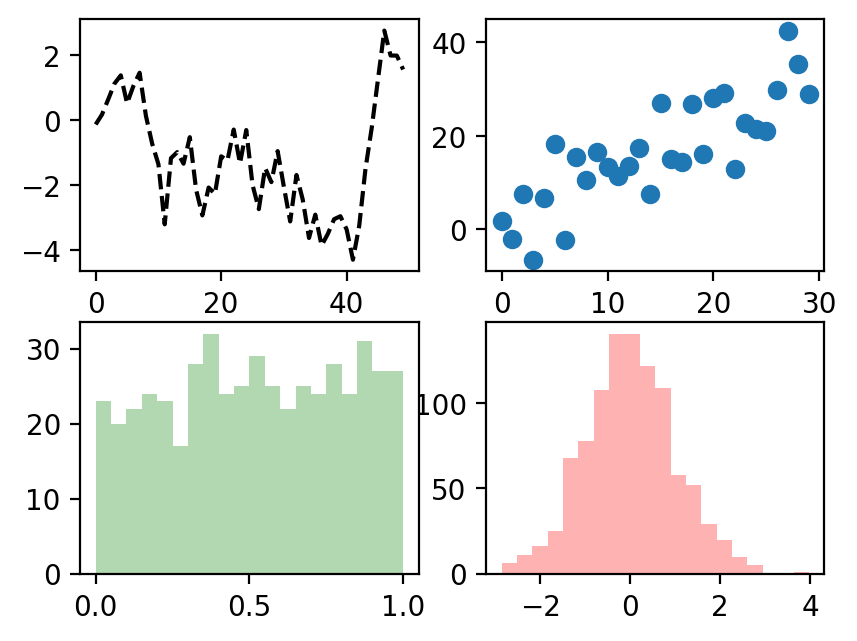

In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn
from numpy.random import rand
import pandas as pd
import imp

fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 4)
ax4 = fig.add_subplot(2,2,3)
ax1.plot(randn(50).cumsum(), 'k--')
ax2.scatter(np.arange(30), np.arange(30) + 6 * randn(30))
ax3.hist(randn(1000), bins=20, color='r', alpha=0.3)
ax4.hist(rand(500), bins=20, color='g', alpha=0.3)

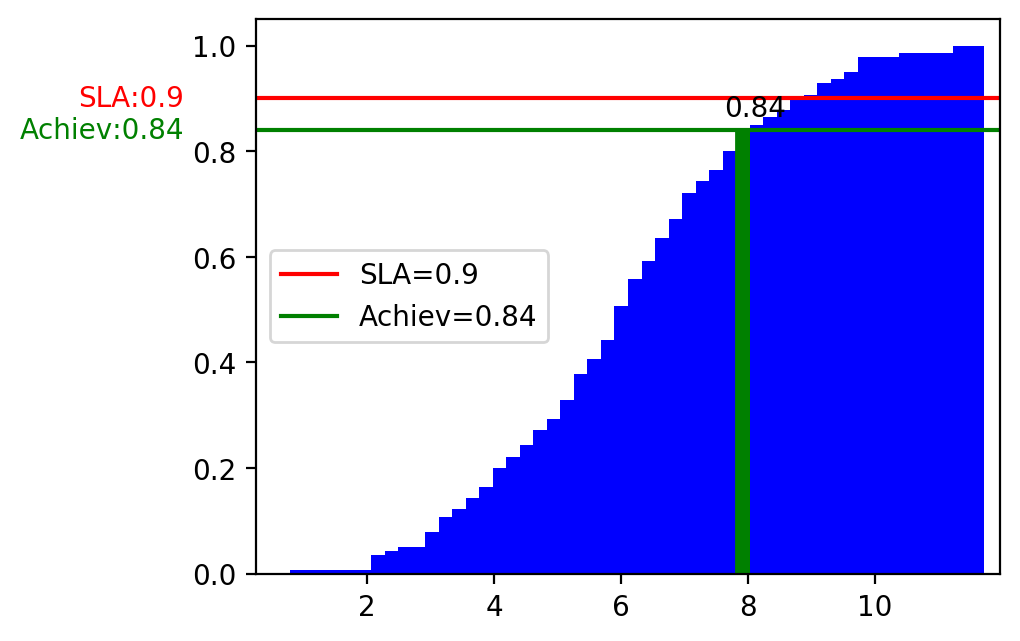

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.transforms as transforms
threshold=.9
bar_value_to_label = 8


fig, ax = plt.subplots()
s = pd.Series(np.random.normal(6,2, 140))
#s = pd.Series(np.random.randint(0, 30, size=200))
counts, bins, bars= ax.hist(s, density=True,cumulative=True ,bins=50, color='b', width=.5)

min_distance = float("inf")  # initialize min_distance with infinity
index_of_bar_to_label = 0
for i, rectangle in enumerate(ax.patches):  # iterate over every bar  
    # tmp = distance from middle of the bar to bar_value_to_label
    tmp = abs((rectangle.get_x() + (rectangle.get_width() * (1 / 2))) - bar_value_to_label)
    if tmp < min_distance: 
        # we are searching for the bar with x cordinate
        # closest to bar_value_to_label
        min_distance = tmp
        index_of_bar_to_label = i
ax.patches[index_of_bar_to_label].set_color('green')

rect=ax.patches[index_of_bar_to_label]
y_value = round(rect.get_height(),2)
x_value = rect.get_x() + rect.get_width() / 2
label= round(y_value,2)
ax.annotate(label,(x_value,y_value),xytext=(-10,5),  textcoords="offset points"  )

ax.axhline(y=threshold, color='r', linestyle='-', label="SLA="+str(threshold))
trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(-.07,threshold,"SLA:"+str(threshold), color="red", transform=trans, 
        ha="right", va="center")
ax.axhline(y=y_value, color='green', linestyle='-', label="Achiev="+str(y_value))
trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(-.07,y_value,"Achiev:"+str(y_value), color="green", transform=trans, 
        ha="right", va="center")


plt.legend()
plt.show()     